In [1]:
# import time
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from optbinning import OptimalBinning
from joblib import Parallel, delayed
warnings.filterwarnings('ignore')

In [2]:
# !pip list --format=freeze > requirements.txt

In [3]:
train = pd.read_parquet('train_seg1.parquet')
oos = pd.read_parquet('oos_seg1.parquet')
oot = pd.read_parquet('oot_seg1.parquet')

In [4]:
train.columns  

Index(['C_GIOITINH', 'TTHONNHAN', 'NHANVIENBIDV', 'BASE_AUM', 'TUOI', 'INCOME',
       'CBAL', 'AFLIMT_AVG', 'LTV', 'N_AVG_DEPOSIT_12M', 'FLAG_SALARY_ACC',
       'FLAG_DEPOSIT', 'UTILIZATION_RATE', 'CNT_CREDIT_CARDS',
       'AMT_CASH_ADVANCE_12M', 'PCT_PAYMENT_TO_BALANCE', 'CNT_MIN_PAY_6M',
       'AVG_DAYS_PAST_DUE', 'DTI_RATIO', 'MOB', 'CNT_OTHER_PRODUCTS',
       'LIMIT_TO_INCOME', 'AMT_VAR_6M', 'CBAL_SHORTTERM_LOAN',
       'CBAL_LONGTERM_LOAN', 'HAS_LONGTERM_LOAN', 'CNT_DPD_30PLUS_6M',
       'OCCUPATION_TYPE', 'DURATION_MAX', 'REMAINING_DURATION_MAX',
       'TIME_TO_OP_MAX', 'RATE_AVG', 'PURCOD_MAX', 'MAX_DPD_12M',
       'AVG_OD_DPD_12M', 'MAX_NHOMNOCIC', 'N_AVG_OVERDUE_CBAL_12M',
       'BAD_NEXT_12M', 'SEGMENT'],
      dtype='object')

In [5]:
target_col = "BAD_NEXT_12M"
train[target_col] = train[target_col].astype(int)
y_train_full = train[target_col] 

Binning 

In [6]:
# =============================================================================
# HOTFIX: Sửa lỗi xung đột version optbinning & scikit-learn
# Chạy cell này TRƯỚC khi chạy optbinning
# =============================================================================
import sklearn.utils.validation

# Lưu lại hàm gốc
_original_check_array = sklearn.utils.validation.check_array

# Viết hàm đè (wrapper) để đổi tên tham số cũ thành mới
def _patched_check_array(*args, **kwargs):
    if 'force_all_finite' in kwargs:
        # Đổi tên tham số cũ (force...) thành mới (ensure...)
        kwargs['ensure_all_finite'] = kwargs.pop('force_all_finite')
    return _original_check_array(*args, **kwargs)

# Áp dụng bản vá
sklearn.utils.validation.check_array = _patched_check_array
sklearn.utils.check_array = _patched_check_array

print("Đã vá lỗi 'force_all_finite' thành công! Bạn có thể chạy tiếp.")

Đã vá lỗi 'force_all_finite' thành công! Bạn có thể chạy tiếp.


Skip FLAG_DEPOSIT: Biến hằng số (1 unique value)
Skip HAS_LONGTERM_LOAN: Biến hằng số (1 unique value)
Skip AVG_OD_DPD_12M: Biến hằng số (1 unique value)

Processing: C_GIOITINH
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[M],250051,0.506309,245129,4922,0.019684,0.002376,0.000003,3.569283e-07
1,[F],243819,0.493691,238997,4822,0.019777,-0.002431,0.000003,3.652072e-07
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,493870,1.000000,484126,9744,0.019730,,0.000006,7.221355e-07


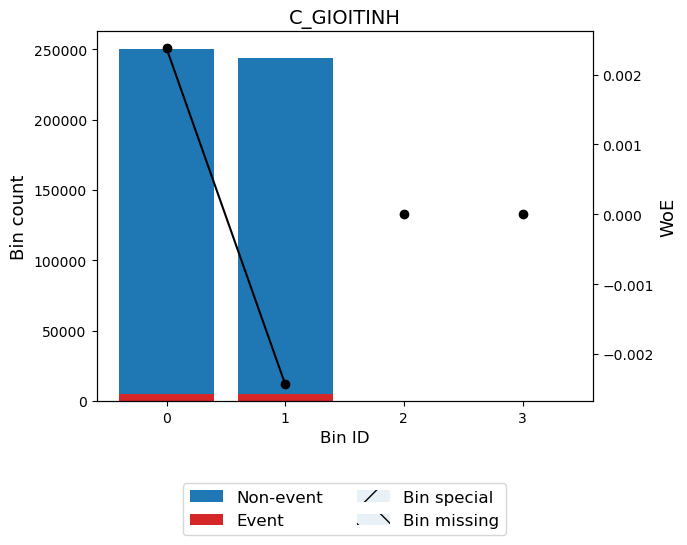


Processing: TTHONNHAN
   -> STATUS: OPTIMAL
   -> IV: 0.0395
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[Married],304768,0.617102,299693,5075,0.016652,0.172739,0.016964,0.002118
1,[Single],189102,0.382898,184433,4669,0.024690,-0.229352,0.022524,0.002809
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.039488,0.004927


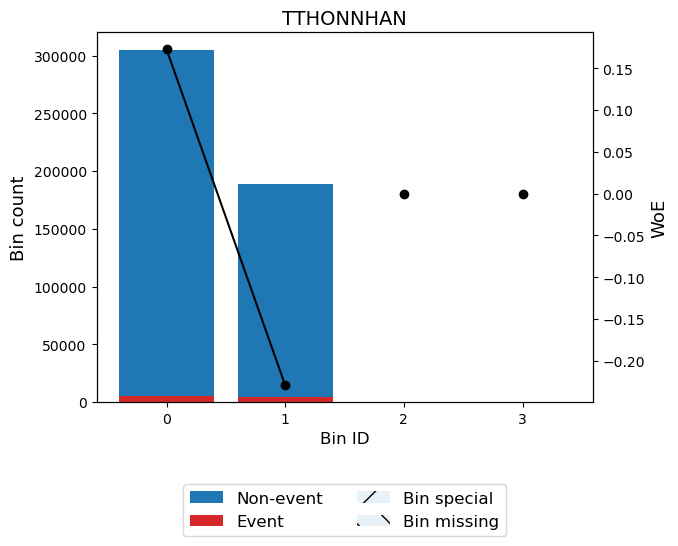


Processing: NHANVIENBIDV
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[0, 1]",493870,1.0,484126,9744,0.01973,0.0,0.0,0.0
1,Special,0,0.0,0,0,0.00000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.00000,0.0,0.0,0.0
Totals,,493870,1.0,484126,9744,0.01973,,0.0,0.0


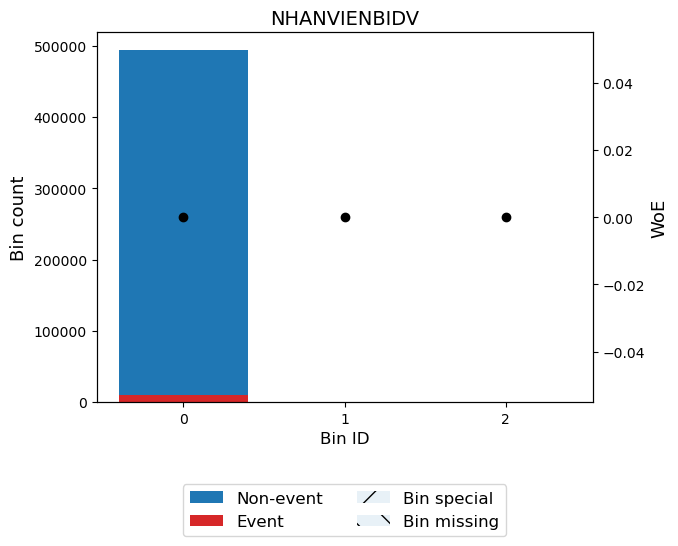


Processing: BASE_AUM
   -> STATUS: OPTIMAL
   -> IV: 0.0644
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 10083228.00)",166903,0.337949,163007,3896,0.023343,-0.171851,0.010849,0.001354
1,"[10083228.00, 17412886.00)",132688,0.268670,129775,2913,0.021954,-0.109075,0.003370,0.000421
2,"[17412886.00, 25662517.00)",78292,0.158528,76782,1510,0.019287,0.023167,0.000084,0.000011
3,"[25662517.00, 39748966.00)",59667,0.120815,58805,862,0.014447,0.317033,0.010463,0.001302
4,"[39748966.00, inf)",56320,0.114038,55757,563,0.009996,0.689785,0.039588,0.004853
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.064353,0.007941


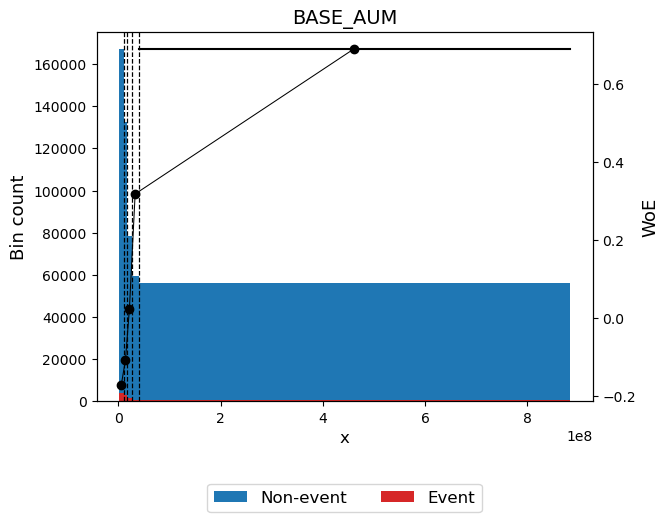


Processing: TUOI
   -> STATUS: OPTIMAL
   -> IV: 0.1171
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 30.50)",86902,0.175961,83960,2942,0.033854,-0.554443,0.071248,0.008794
1,"[30.50, 35.50)",81875,0.165782,80170,1705,0.020824,-0.055109,0.000517,0.000065
2,"[35.50, 39.50)",80080,0.162148,78542,1538,0.019206,0.027457,0.000121,0.000015
3,"[39.50, 45.50)",115051,0.232958,113218,1833,0.015932,0.217668,0.009957,0.001242
4,"[45.50, inf)",129962,0.263150,128236,1726,0.013281,0.402372,0.035307,0.004384
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.117150,0.014499


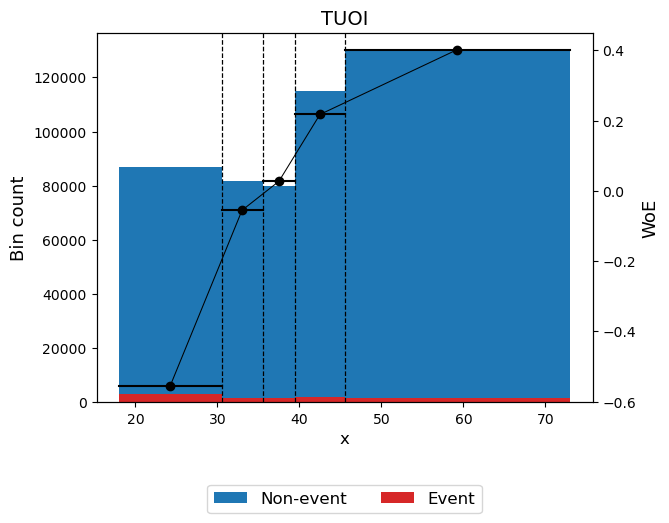


Processing: INCOME
   -> STATUS: OPTIMAL
   -> IV: 0.1188
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 17191980.00)",69833,0.141400,67387,2446,0.035026,-0.589695,0.065948,8.126036e-03
1,"[17191980.00, 21420567.00)",109538,0.221795,107320,2218,0.020249,-0.026484,0.000158,1.969528e-05
2,"[21420567.00, 24724244.00)",90932,0.184121,89132,1800,0.019795,-0.003362,0.000002,2.605215e-07
3,"[24724244.00, 29993643.00)",99969,0.202420,98273,1696,0.016965,0.153783,0.004450,5.556620e-04
4,"[29993643.00, inf)",99003,0.200464,97874,1129,0.011404,0.556655,0.048039,5.928583e-03
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
6,Missing,24595,0.049801,24140,455,0.018500,0.065635,0.000208,2.598376e-05
Totals,,493870,1.000000,484126,9744,0.019730,,0.118804,1.465622e-02


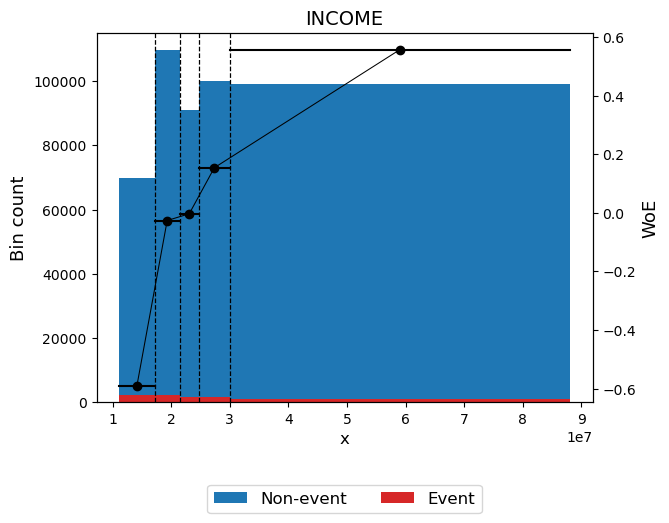


Processing: CBAL
   -> STATUS: OPTIMAL
   -> IV: 0.0373
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 161460016.00)",60262,0.122020,59516,746,0.012379,0.473581,0.021962,2.719922e-03
1,"[161460016.00, 259650032.00)",109486,0.221690,107545,1941,0.017728,0.109013,0.002501,3.124807e-04
2,"[259650032.00, 377118272.00)",117522,0.237961,115215,2307,0.019630,0.005158,0.000006,7.895568e-07
3,"[377118272.00, 483800432.00)",75143,0.152151,73554,1589,0.021146,-0.070779,0.000789,9.856679e-05
4,"[483800432.00, inf)",131457,0.266177,128296,3161,0.024046,-0.202242,0.012013,1.499076e-03
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,493870,1.000000,484126,9744,0.019730,,0.037271,4.630835e-03


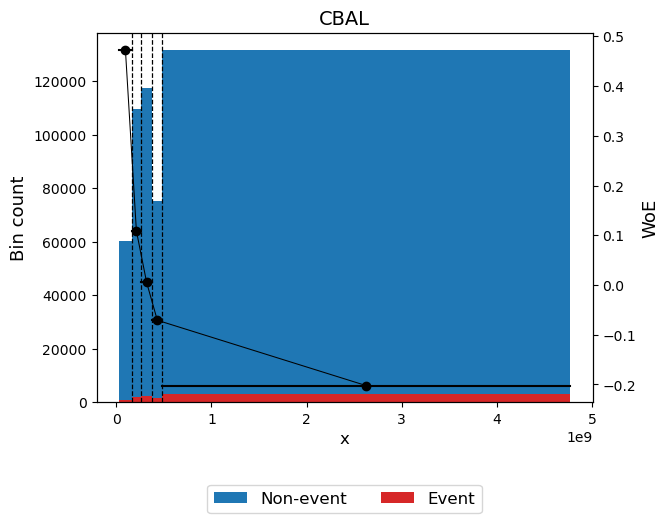


Processing: AFLIMT_AVG
   -> STATUS: OPTIMAL
   -> IV: 0.0409
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 491188368.00)",75271,0.152411,73077,2194,0.029148,-0.399906,2.968022e-02,3.685502e-03
1,"[491188368.00, 633523584.00)",125766,0.254654,123285,2481,0.019727,0.000144,5.247274e-09,6.559093e-10
2,"[633523584.00, 749878976.00)",96971,0.196349,95210,1761,0.018160,0.08451,1.346837e-03,1.683045e-04
3,"[749878976.00, 935588352.00)",90427,0.183099,88833,1594,0.017627,0.114818,2.285299e-03,2.855055e-04
4,"[935588352.00, inf)",105435,0.213487,103721,1714,0.016256,0.197181,7.560067e-03,9.434804e-04
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
Totals,,493870,1.000000,484126,9744,0.019730,,4.087243e-02,5.082793e-03


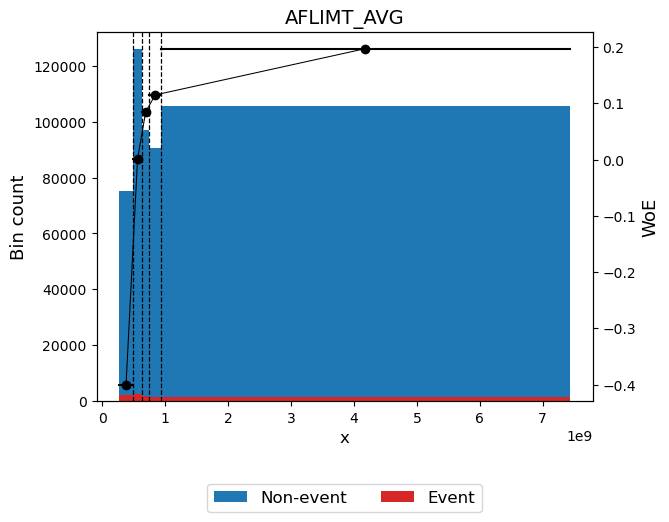


Processing: LTV
   -> STATUS: OPTIMAL
   -> IV: 0.4502
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 12.40)",61887,0.125310,61607,280,0.004524,1.488048,0.146600,0.016802
1,"[12.40, 19.81)",59461,0.120398,59111,350,0.005886,1.223546,0.105444,0.012415
2,"[19.81, 195.09)",79838,0.161658,79191,647,0.008104,0.901578,0.087611,0.010595
3,"[195.09, inf)",292684,0.592634,284217,8467,0.028929,-0.392132,0.110531,0.013729
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.450186,0.053541


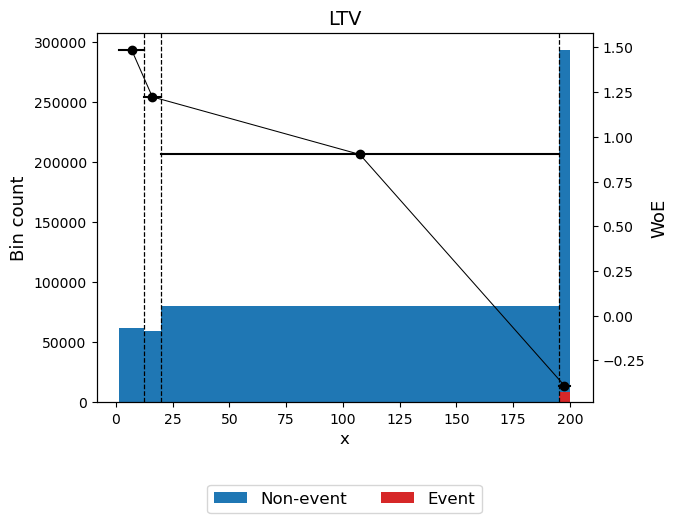


Processing: N_AVG_DEPOSIT_12M
   -> STATUS: OPTIMAL
   -> IV: 0.4957
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 2592813.00)",89593,0.181410,85947,3646,0.040695,-0.745593,0.146620,0.017914
1,"[2592813.00, 3704846.00)",110472,0.223686,107425,3047,0.027582,-0.343058,0.031153,0.003875
2,"[3704846.00, 5637439.50)",106051,0.214735,104264,1787,0.016850,0.160694,0.005137,0.000641
3,"[5637439.50, 9800770.00)",95755,0.193887,94887,868,0.009065,0.788557,0.084309,0.010274
4,"[9800770.00, inf)",91999,0.186282,91603,396,0.004304,1.538112,0.228521,0.026045
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.495742,0.058750


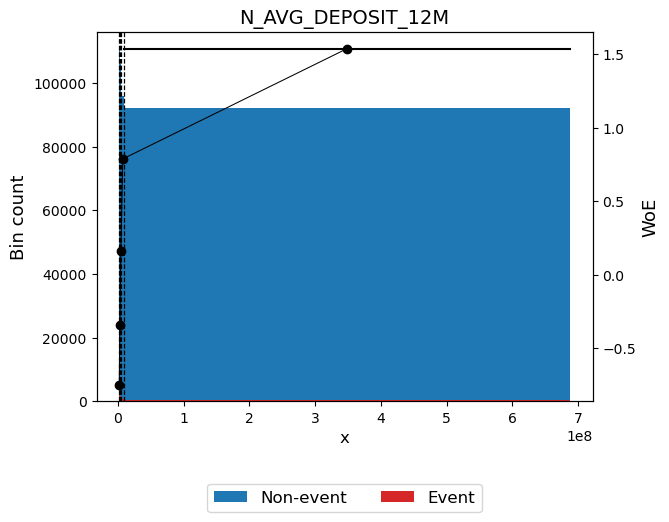


Processing: FLAG_SALARY_ACC
   -> STATUS: INFEASIBLE
   -> Skip: Không tạo được bin tối ưu

Processing: UTILIZATION_RATE
   -> STATUS: OPTIMAL
   -> IV: 0.1733
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.36)",156604,0.317096,154859,1745,0.011143,0.580067,0.081667,0.010068
1,"[0.36, 0.51)",119621,0.242212,117664,1957,0.016360,0.190727,0.008049,0.001005
2,"[0.51, 0.61)",71806,0.145395,70241,1565,0.021795,-0.101647,0.001578,0.000197
3,"[0.61, 0.71)",77364,0.156649,75266,2098,0.027119,-0.325649,0.019488,0.002425
4,"[0.71, inf)",68475,0.138650,66096,2379,0.034743,-0.581265,0.062558,0.007711
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.173340,0.021406


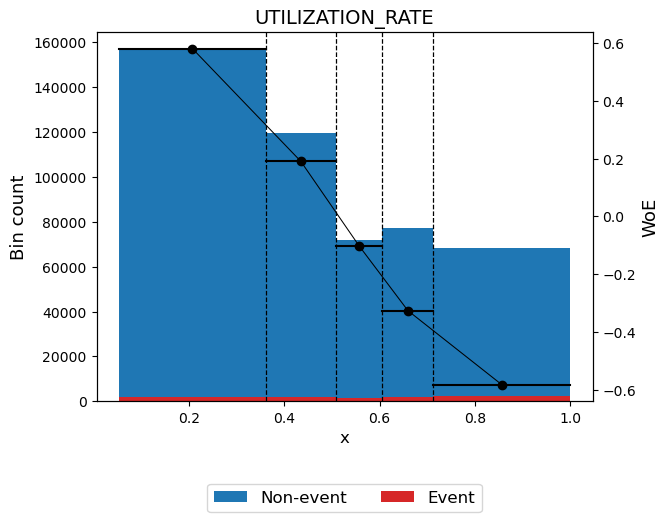


Processing: CNT_CREDIT_CARDS
   -> STATUS: OPTIMAL
   -> IV: 0.0004
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",110112,0.222957,107960,2152,0.019544,0.00967,0.000021,0.000003
1,"[0.50, 2.50)",289098,0.585373,283446,5652,0.019550,0.009319,0.000051,0.000006
2,"[2.50, inf)",94660,0.191670,92720,1940,0.020494,-0.038797,0.000294,0.000037
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.000365,0.000046


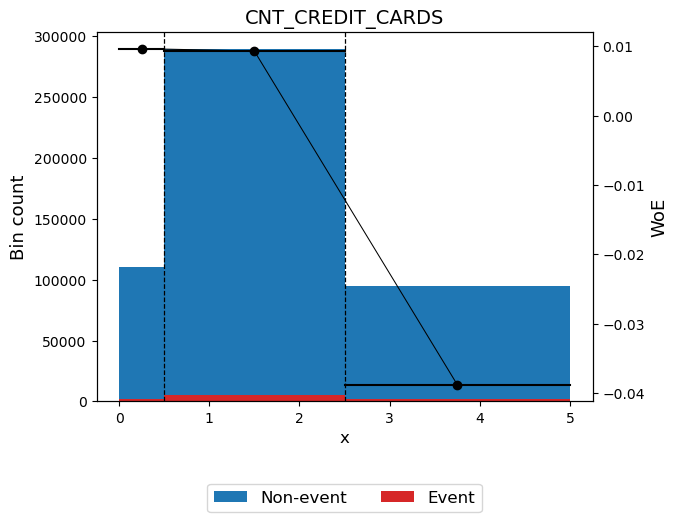


Processing: AMT_CASH_ADVANCE_12M
   -> STATUS: OPTIMAL
   -> IV: 0.0498
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 39247570.00)",437341,0.885539,429471,7870,0.017995,0.093803,0.007451,0.000931
1,"[39247570.00, inf)",56529,0.114461,54655,1874,0.033151,-0.532728,0.042314,0.005228
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.049765,0.006159


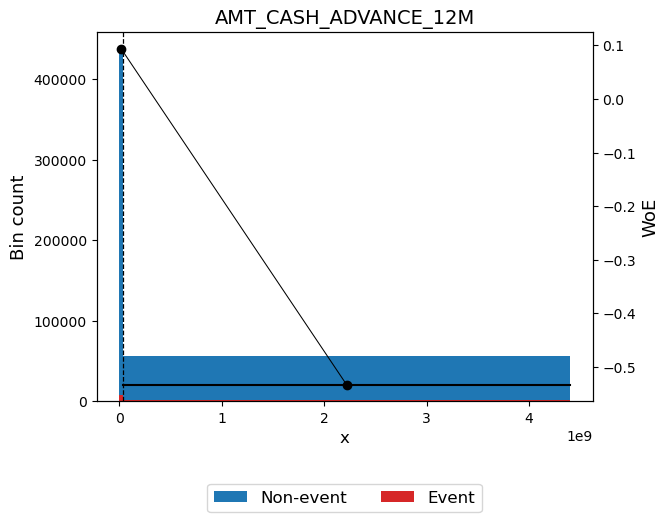


Processing: PCT_PAYMENT_TO_BALANCE
   -> STATUS: OPTIMAL
   -> IV: 0.1199
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.81)",75750,0.153380,73212,2538,0.033505,-0.543711,0.059397,0.007334
1,"[0.81, 0.99)",77379,0.156679,75558,1821,0.023534,-0.180179,0.005552,0.000693
2,"[0.99, 1.13)",78385,0.158716,76768,1617,0.020629,-0.045478,0.000336,0.000042
3,"[1.13, 1.40)",142853,0.289252,140576,2277,0.015939,0.217196,0.012312,0.001536
4,"[1.40, inf)",119503,0.241973,118012,1491,0.012477,0.465646,0.042255,0.005235
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.119852,0.014840


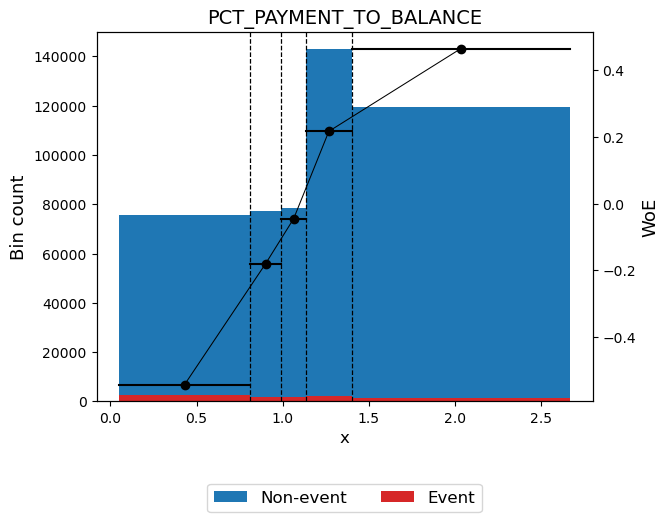


Processing: CNT_MIN_PAY_6M
   -> STATUS: OPTIMAL
   -> IV: 0.2985
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",398937,0.807777,393431,5506,0.013802,0.363374,0.089970,0.011185
1,"[0.50, inf)",94933,0.192223,90695,4238,0.044642,-0.842283,0.208546,0.025324
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.298517,0.036509


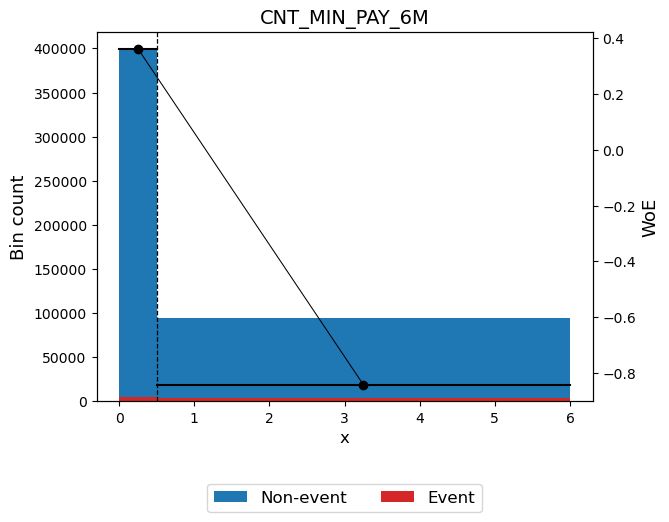


Processing: AVG_DAYS_PAST_DUE
   -> STATUS: OPTIMAL
   -> IV: 0.2829
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",399423,0.808761,393837,5586,0.013985,0.34998,0.084074,0.010456
1,"[0.50, inf)",94447,0.191239,90289,4158,0.044025,-0.827712,0.198837,0.024169
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.282911,0.034625


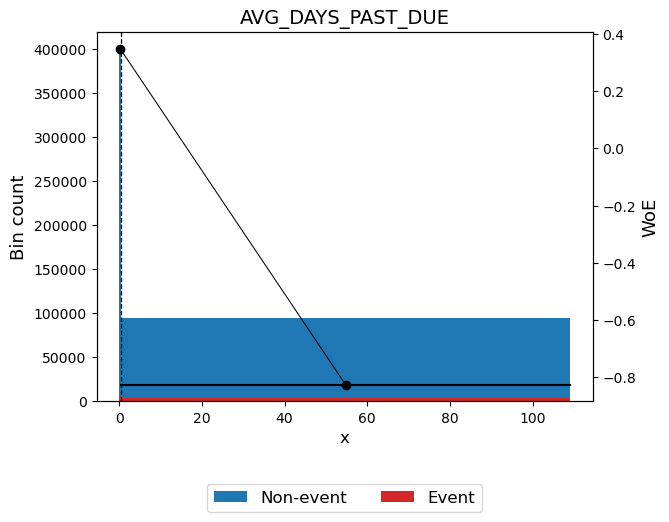


Processing: DTI_RATIO
   -> STATUS: OPTIMAL
   -> IV: 0.2126
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.68)",79775,0.161530,78979,796,0.009978,0.691645,0.056332,0.006904
1,"[0.68, 1.04)",122592,0.248227,121000,1592,0.012986,0.425106,0.036794,0.004565
2,"[1.04, 1.56)",154572,0.312981,151666,2906,0.018800,0.04921,0.000740,0.000093
3,"[1.56, 1.99)",75370,0.152611,73482,1888,0.025050,-0.244171,0.010250,0.001278
4,"[1.99, inf)",61561,0.124650,58999,2562,0.041617,-0.768961,0.108473,0.013235
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.212588,0.026074


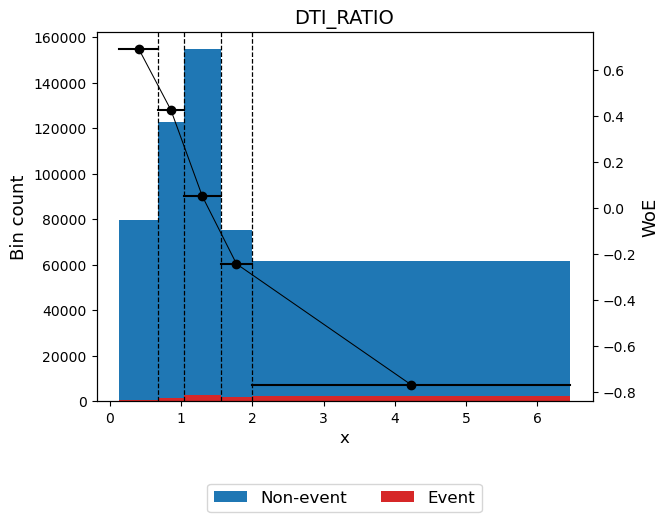


Processing: MOB
   -> STATUS: OPTIMAL
   -> IV: 0.0006
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 21.50)",69383,0.140488,68084,1299,0.018722,0.053454,0.000391,0.000049
1,"[21.50, 60.50)",168766,0.341722,165457,3309,0.019607,0.006372,0.000014,0.000002
2,"[60.50, inf)",255721,0.517790,250585,5136,0.020084,-0.01817,0.000172,0.000022
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.000578,0.000072


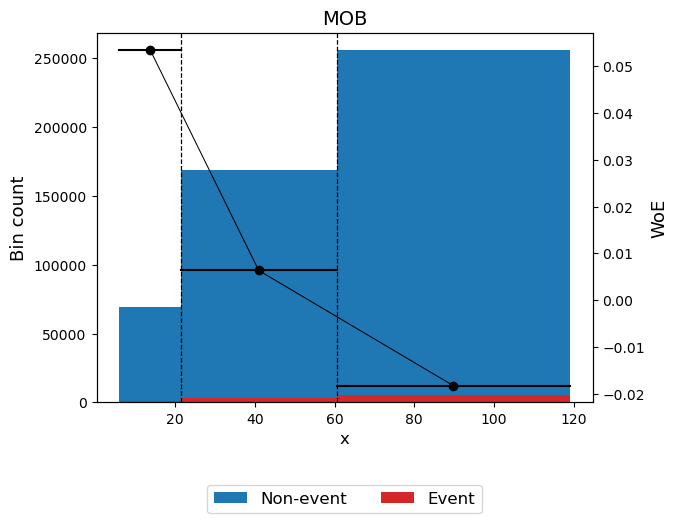


Processing: CNT_OTHER_PRODUCTS
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1.50)",420319,0.851072,412015,8304,0.019756,-0.001371,0.000002,2.001137e-07
1,"[1.50, inf)",73551,0.148928,72111,1440,0.019578,0.00787,0.000009,1.148663e-06
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,493870,1.000000,484126,9744,0.019730,,0.000011,1.348777e-06


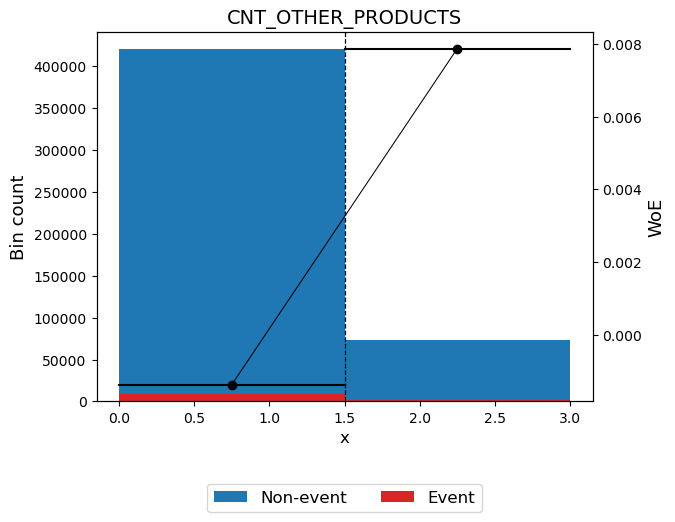


Processing: LIMIT_TO_INCOME
   -> STATUS: OPTIMAL
   -> IV: 0.0505
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 27.94)",139811,0.283093,137522,2289,0.016372,0.189975,0.009337,0.001165
1,"[27.94, 29.81)",70030,0.141798,68802,1228,0.017535,0.120152,0.001933,0.000242
2,"[29.81, 34.27)",171652,0.347565,168585,3067,0.017868,0.101047,0.003382,0.000423
3,"[34.27, inf)",112377,0.227544,109217,3160,0.028120,-0.362929,0.035823,0.004453
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.050475,0.006283


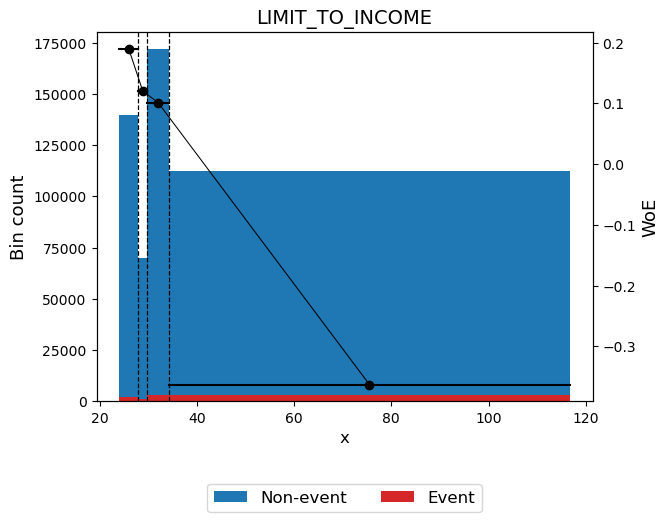


Processing: AMT_VAR_6M
   -> STATUS: OPTIMAL
   -> IV: 0.0001
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -0.22)",67261,0.136192,65963,1298,0.019298,0.022576,6.866538e-05,8.582991e-06
1,"[-0.22, 0.18)",337972,0.684334,331304,6668,0.019729,0.000023,3.596687e-10,4.495855e-11
2,"[0.18, inf)",88637,0.179474,86859,1778,0.020059,-0.016897,5.165649e-05,6.456985e-06
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
Totals,,493870,1.000000,484126,9744,0.019730,,1.203222e-04,1.504002e-05


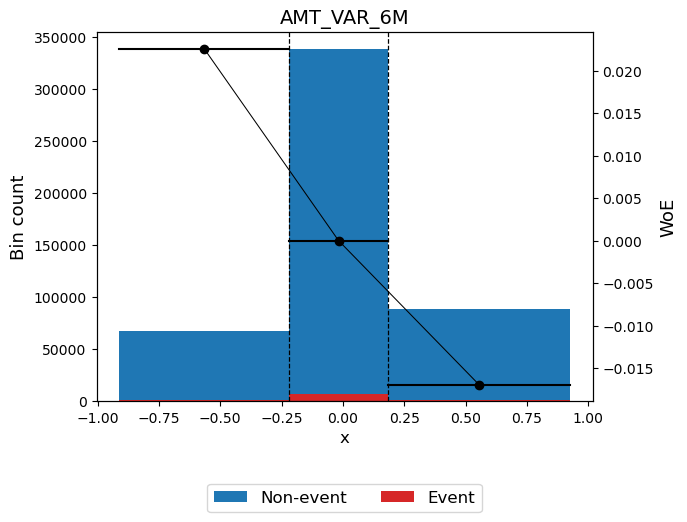


Processing: CBAL_SHORTTERM_LOAN
   -> STATUS: OPTIMAL
   -> IV: 0.0087
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 63508308.00)",113193,0.229196,111188,2005,0.017713,0.109885,0.002626,0.000328
1,"[63508308.00, 161659024.00)",153158,0.310118,150297,2861,0.018680,0.055749,0.000938,0.000117
2,"[161659024.00, 248671616.00)",89394,0.181007,87578,1816,0.020315,-0.0298,0.000163,0.000020
3,"[248671616.00, 359606320.00)",65174,0.131966,63805,1369,0.021005,-0.063942,0.000556,0.000070
4,"[359606320.00, inf)",72951,0.147713,71258,1693,0.023207,-0.165889,0.004406,0.000550
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.008690,0.001085


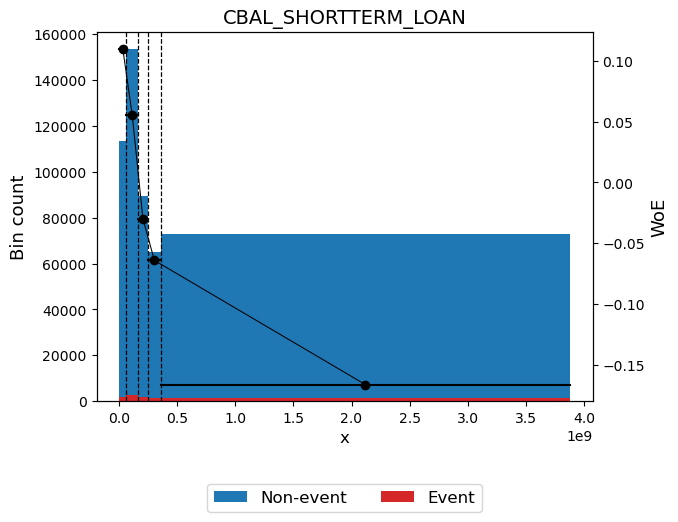


Processing: CBAL_LONGTERM_LOAN
   -> STATUS: OPTIMAL
   -> IV: 0.0159
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 37526144.00)",67242,0.136153,66100,1142,0.016983,0.152694,0.002952,0.000369
1,"[37526144.00, 101978536.00)",112289,0.227366,110321,1968,0.017526,0.120683,0.003126,0.000391
2,"[101978536.00, 189704120.00)",120316,0.243619,118046,2270,0.018867,0.045601,0.000496,0.000062
3,"[189704120.00, 249128928.00)",56277,0.113951,55137,1140,0.020257,-0.026901,0.000084,0.000010
4,"[249128928.00, inf)",137746,0.278911,134522,3224,0.023405,-0.174589,0.009254,0.001155
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.015912,0.001987


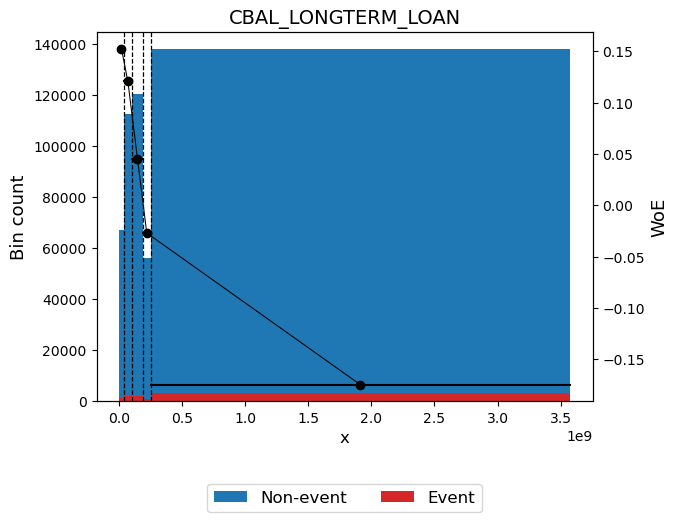


Processing: CNT_DPD_30PLUS_6M
   -> STATUS: INFEASIBLE
   -> Skip: Không tạo được bin tối ưu

Processing: OCCUPATION_TYPE
   -> STATUS: OPTIMAL
   -> IV: 0.0008
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[1],197201,0.399297,193419,3782,0.019178,0.028912,0.000329,4.114713e-05
1,[4],49544,0.100318,48578,966,0.019498,0.012069,0.000015,1.815900e-06
2,[3],99093,0.200646,97130,1963,0.019810,-0.004117,0.000003,4.259770e-07
3,[2],148032,0.299739,144999,3033,0.020489,-0.038519,0.000453,5.662759e-05
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,493870,1.000000,484126,9744,0.019730,,0.000800,1.000166e-04


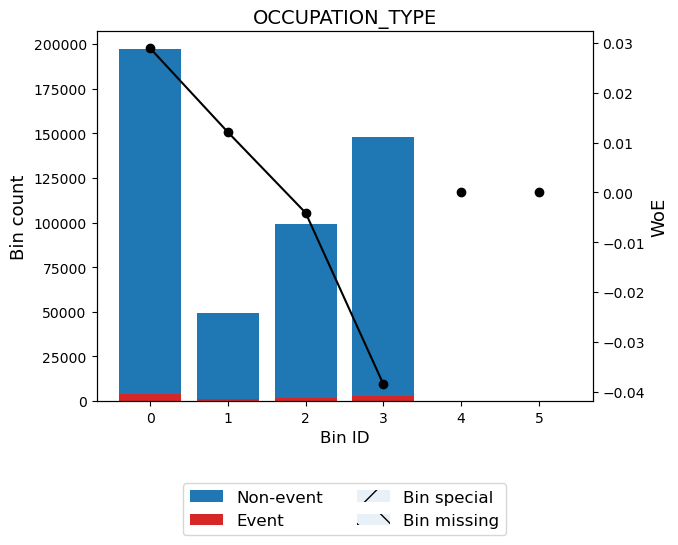


Processing: DURATION_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0002
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 48.00)",160616,0.325219,157488,3128,0.019475,0.013262,0.000057,7.104508e-06
1,"[48.00, 150.00)",237592,0.481082,232912,4680,0.019698,0.001669,0.000001,1.673957e-07
2,"[150.00, inf)",95662,0.193699,93726,1936,0.020238,-0.025942,0.000132,1.649859e-05
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,493870,1.000000,484126,9744,0.019730,,0.000190,2.377049e-05


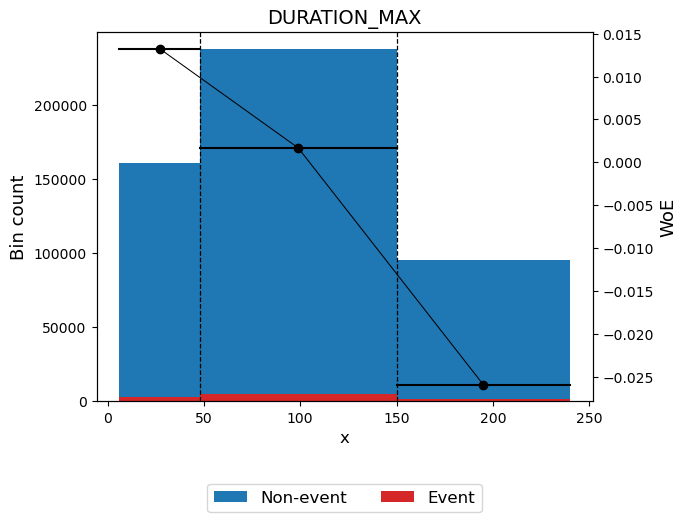


Processing: REMAINING_DURATION_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0002
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 14.50)",97069,0.196548,95199,1870,0.019265,0.024338,0.000115,1.438307e-05
1,"[14.50, 31.50)",150609,0.304957,147651,2958,0.019640,0.004645,0.000007,8.204685e-07
2,"[31.50, 54.50)",108825,0.220352,106672,2153,0.019784,-0.002797,0.000002,2.157724e-07
3,"[54.50, inf)",137367,0.278144,134604,2763,0.020114,-0.019673,0.000109,1.358440e-05
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,493870,1.000000,484126,9744,0.019730,,0.000232,2.900372e-05


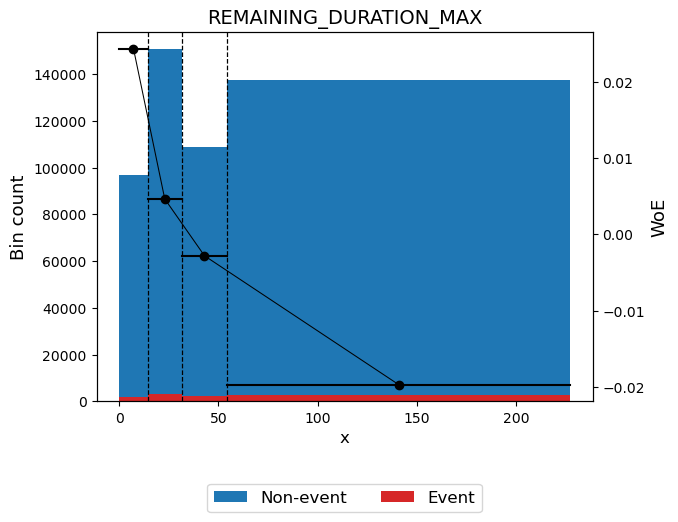


Processing: TIME_TO_OP_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0007
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 10.50)",75427,0.152726,74008,1419,0.018813,0.048527,0.000351,0.000044
1,"[10.50, 43.50)",249495,0.505184,244599,4896,0.019624,0.005508,0.000015,0.000002
2,"[43.50, inf)",168948,0.342090,165519,3429,0.020296,-0.028876,0.000289,0.000036
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.000656,0.000082


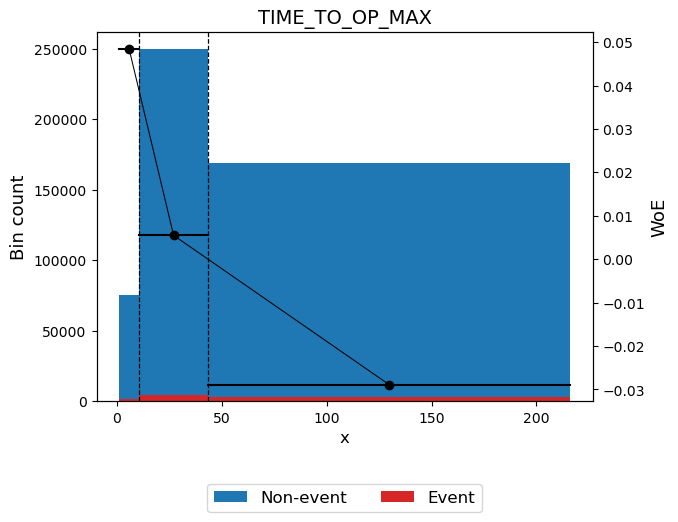


Processing: RATE_AVG
   -> STATUS: OPTIMAL
   -> IV: 0.2648
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 6.14)",74534,0.150918,73862,672,0.009016,0.794002,0.066380,0.008086
1,"[6.14, 8.57)",192320,0.389414,189757,2563,0.013327,0.398872,0.051424,0.006386
2,"[8.57, 10.01)",113289,0.229390,110970,2319,0.020470,-0.03757,0.000330,0.000041
3,"[10.01, 11.04)",55054,0.111475,53465,1589,0.028863,-0.389771,0.020517,0.002549
4,"[11.04, inf)",58673,0.118803,56072,2601,0.044330,-0.834953,0.126172,0.015329
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.264823,0.032390


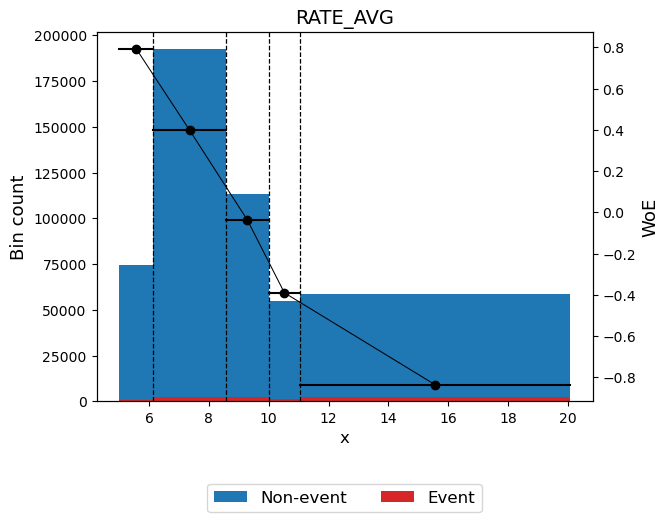


Processing: PURCOD_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0001
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[3],49763,0.100761,48794,969,0.019472,0.013405,1.798886e-05,2.248591e-06
1,[1],98948,0.200352,97008,1940,0.019606,0.006412,8.211876e-06,1.026483e-06
2,[6],247347,0.500834,242469,4878,0.019721,0.000445,9.918989e-08,1.239874e-08
3,"[2, 9]",97812,0.198052,95855,1957,0.020008,-0.01427,4.060496e-05,5.075577e-06
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
Totals,,493870,1.000000,484126,9744,0.019730,,6.690488e-05,8.363049e-06


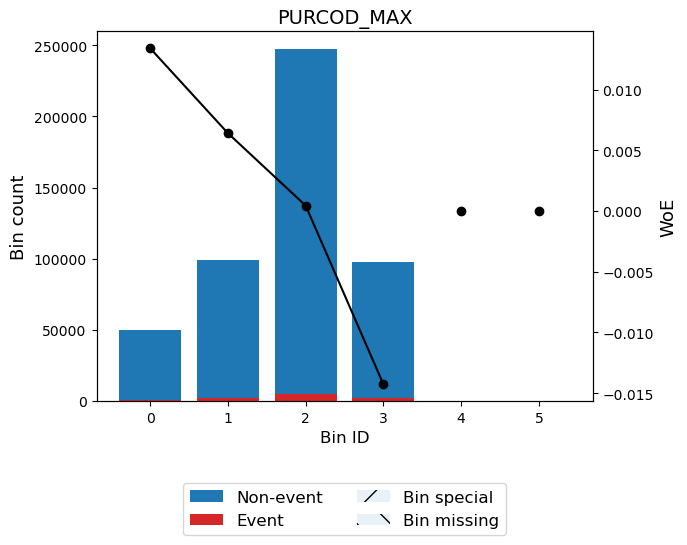


Processing: MAX_DPD_12M
   -> STATUS: OPTIMAL
   -> IV: 1.2980
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",198726,0.402385,197686,1040,0.005233,1.341766,0.404681,0.047102
1,"[0.50, 1.50)",81346,0.164711,80622,724,0.008900,0.807042,0.074433,0.009060
2,"[1.50, 3.50)",80173,0.162336,79186,987,0.012311,0.479191,0.029840,0.003695
3,"[3.50, 9.50)",79817,0.161615,78265,1552,0.019444,0.014863,0.000035,0.000004
4,"[9.50, inf)",53808,0.108952,48367,5441,0.101119,-1.720839,0.788986,0.088012
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,1.297975,0.147873


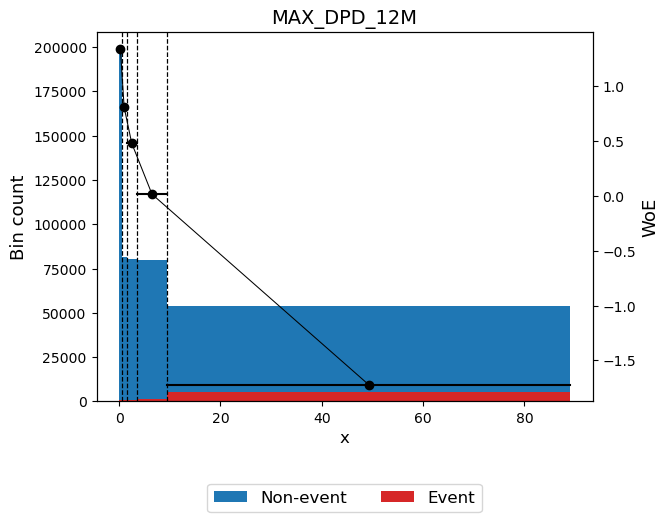


Processing: MAX_NHOMNOCIC
   -> STATUS: OPTIMAL
   -> IV: 1.1155
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1.50)",440062,0.891048,435759,4303,0.009778,0.712083,0.326482,0.039969
1,"[1.50, inf)",53808,0.108952,48367,5441,0.101119,-1.720839,0.788986,0.088012
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,1.115468,0.127981


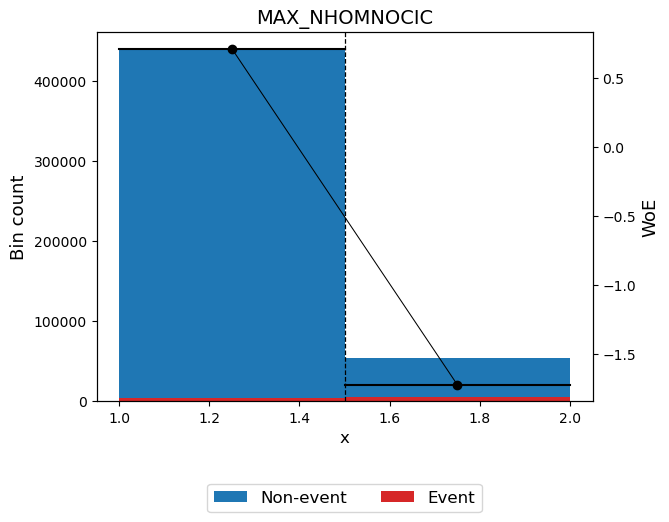


Processing: N_AVG_OVERDUE_CBAL_12M
   -> STATUS: OPTIMAL
   -> IV: 0.5224
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 59107728.00)",211105,0.427451,209867,1238,0.005864,1.227283,0.376094,0.044267
1,"[59107728.00, 135607376.00)",92887,0.188080,90538,2349,0.025289,-0.253914,0.013726,0.001711
2,"[135607376.00, 188305408.00)",62031,0.125602,60215,1816,0.029276,-0.404408,0.025070,0.003113
3,"[188305408.00, 263378992.00)",59376,0.120226,57488,1888,0.031797,-0.489635,0.036730,0.004546
4,"[263378992.00, inf)",68471,0.138642,66018,2453,0.035825,-0.613078,0.070737,0.008706
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,493870,1.000000,484126,9744,0.019730,,0.522356,0.062343


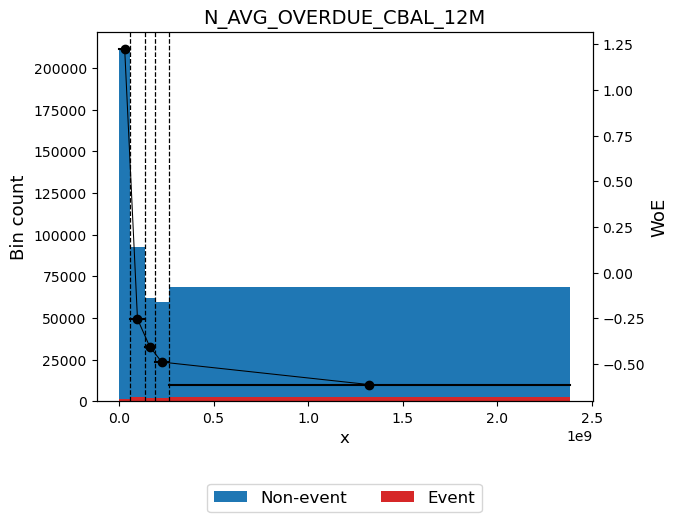

In [7]:
cols_num = [
    'BASE_AUM', 'TUOI', 'INCOME', 'CBAL', 'AFLIMT_AVG', 'LTV', 
    'N_AVG_DEPOSIT_12M', 'UTILIZATION_RATE', 'AMT_CASH_ADVANCE_12M',
    'PCT_PAYMENT_TO_BALANCE', 'AVG_DAYS_PAST_DUE', 'DTI_RATIO', 
    'LIMIT_TO_INCOME', 'AMT_VAR_6M', 'CBAL_SHORTTERM_LOAN', 
    'CBAL_LONGTERM_LOAN', 'RATE_AVG', 'MAX_DPD_12M', 'AVG_OD_DPD_12M', 
    'N_AVG_OVERDUE_CBAL_12M', 'CNT_CREDIT_CARDS', 'CNT_MIN_PAY_6M', 
    'CNT_OTHER_PRODUCTS', 'CNT_DPD_30PLUS_6M', 'MOB', 'DURATION_MAX', 
    'REMAINING_DURATION_MAX', 'TIME_TO_OP_MAX', 'MAX_NHOMNOCIC'
]

# 2. List Categorical (Gồm String + Số dạng Nominal + Flags)
cols_cat = [
    'C_GIOITINH', 'TTHONNHAN', 'SEGMENT', # Gốc String
    'OCCUPATION_TYPE', 'PURCOD_MAX',      # Gốc Số -> Ép sang Cate
    'NHANVIENBIDV', 'FLAG_SALARY_ACC', 'FLAG_DEPOSIT' # Flag 0/1 -> Ép sang Cate
]

exclude_cols = [
    "SEGMENT", "SAMPLE_TYPE", target_col
]

candidates = [c for c in train.columns if c not in exclude_cols]

# --- BƯỚC LỌC THÔ (PRE-FILTER) ---
clean_candidates = []
for c in candidates:
    # 1. Loại biến chỉ có 1 giá trị duy nhất (Constant)
    if train[c].nunique() <= 1:
        print(f"Skip {c}: Biến hằng số (1 unique value)")
        continue
        
    # 2. Loại biến 100% Missing
    if train[c].isnull().all():
        print(f"Skip {c}: Biến 100% Null")
        continue
        
    clean_candidates.append(c)

# Cập nhật lại list cần chạy
candidates = clean_candidates

binning_results = {}

for feature in candidates:
    print(f"\nProcessing: {feature}")

    try:
        # Xác định loại biến
        if feature in cols_cat:
            dtype_input = "categorical"
            # Quan trọng: Biến Cate cần fillna để thành 1 nhóm riêng và ép kiểu string
            x_clean = train[feature].fillna("MISSING").astype(str).values
            
            # Cấu hình cho Categorical         # Mixed-Integer Programming (Tốt nhất cho Cate)
            trend = None                # Gom nhóm nhỏ < 5% vào Others
            
        elif feature in cols_num:
            dtype_input = "numerical"
            x_clean = train[feature].values
            
            # Cấu hình cho Numerical      # Constraint Programming (Tốt nhất cho Num)
            trend = "auto_asc_desc"      # Ép Monotonic (Tăng hoặc Giảm)

        optb = OptimalBinning(
            name=feature,
            dtype=dtype_input,
            solver="mip",
            monotonic_trend=trend,
            max_n_bins=5,
            prebinning_method='cart',
            divergence='iv',
            min_n_bins=2,
            min_bin_size=0.1
        )

        optb.fit(x_clean, train[target_col])

        print(f"   -> STATUS: {optb.status}")

        if optb.status in ["OPTIMAL", "FEASIBLE"]:
            optb.binning_table.build()
            # Lưu lại kết quả
            binning_results[feature] = optb
 
            # IV
            print(f"   -> IV: {optb.binning_table.iv:.4f}")

            # Hiển thị bảng
            print("   -> Chi tiết các Bin:")
            display(optb.binning_table.build())

            # Vẽ WOE
            try:
                # 1. Xóa plot cũ
                plt.close('all')
                
                # 2. Xử lý tiêu đề cho gọn
                plot_title = f"Var: {feature} | IV: {optb.binning_table.iv:.4f}"
                
                # 3. Vẽ hình dựa trên loại biến
                if dtype_input == "numerical":
                    # Biến số: Vẽ style="actual" để thấy xu hướng tăng/giảm rõ ràng
                    optb.binning_table.plot(metric="woe", style="actual", add_special=True)
                else:
                    # Biến category: KHÔNG dùng style="actual", chỉ vẽ cột mặc định
                    optb.binning_table.plot(metric="woe", add_special=True)
                
                # 4. Hiển thị
                plt.show()
                plt.close() # Đóng ngay

            except Exception as e_plot:
                print(f"   -> Lỗi vẽ hình: {e_plot}")

        else:
            print("   -> Skip: Không tạo được bin tối ưu")

    except Exception as e:
        print(f"   -> ERROR: {e}")

TỔNG HỢP KẾT QUẢ VÀ KIỂM TRA CHẤT LƯỢNG BIẾN

In [8]:
summary_data = []

for feature, optb in binning_results.items():
    # 1. Lấy bảng binning chi tiết
    bt = optb.binning_table.build()
    
    # --- SỬA LỖI TẠI ĐÂY ---
    # Chuyển cột Bin sang string trước khi so sánh để tránh lỗi với biến Category (list)
    bt_clean = bt[bt['Bin'].astype(str) != 'Totals']
    
    # Chỉ xét các bin có dữ liệu (Count > 0)
    valid_bins = bt_clean[bt_clean['Count'] > 0]
    
    if valid_bins.empty:
        continue

    # 2. Tính toán các chỉ số
    iv_value = optb.binning_table.iv
    min_bin_pct = valid_bins['Count (%)'].min() # Tỷ lệ % của bin nhỏ nhất
    max_bin_pct = valid_bins['Count (%)'].max() # Tỷ lệ % của bin lớn nhất
    n_bins = len(valid_bins)

    # 3. Xác định xu hướng (Trend) với PD (Event Rate)
    trend_observed = "N/A (Categorical)"
    
    if optb.dtype == "numerical":
        # Lấy các bin số thực (loại bỏ Special/Missing)
        # Convert sang str để so sánh an toàn
        mask_special = valid_bins['Bin'].astype(str).isin(['Special', 'Missing'])
        numeric_bins = valid_bins[~mask_special]
        
        if len(numeric_bins) >= 2:
            first_er = numeric_bins.iloc[0]['Event rate']
            last_er = numeric_bins.iloc[-1]['Event rate']
            
            if last_er > first_er:
                trend_observed = "Tăng (Thuận)"
            elif last_er < first_er:
                trend_observed = "Giảm (Nghịch)"
            else:
                trend_observed = "Không rõ (Flat)"

    # 4. Gắn cờ cảnh báo (Flag Issues)
    issues = []
    if iv_value < 0.02: 
        issues.append("Weak IV")
    if min_bin_pct < 0.05: 
        issues.append("Small Bin (<5%)")
    if optb.status != "OPTIMAL":
        issues.append(f"Status: {optb.status}")
    if n_bins < 2:
        issues.append("Single Bin")

    # 5. Đưa vào danh sách tổng hợp
    summary_data.append({
        "Variable": feature,
        "IV": iv_value,
        "Trend_PD": trend_observed,
        "Min_Bin_Pct": min_bin_pct,
        "Max_Bin_Pct": max_bin_pct,
        "Num_Bins": n_bins,
        "Quality_Check": ", ".join(issues) if issues else "PASS"
    })

# --- HIỂN THỊ KẾT QUẢ ---
if summary_data:
    df_summary = pd.DataFrame(summary_data)
    
    # Sắp xếp theo IV giảm dần
    df_summary = df_summary.sort_values("IV", ascending=False).reset_index(drop=True)
    
    # Hiển thị full danh sách
    pd.set_option('display.max_rows', None)
    
    print(f"Tổng số biến đạt yêu cầu: {len(df_summary)}")
    
    # Hiển thị bảng bình thường với format số đẹp
    display(df_summary.style.format({
        "IV": "{:.4f}",
        "Min_Bin_Pct": "{:.2%}",
        "Max_Bin_Pct": "{:.2%}"
    }))
    
else:
    print("Không có biến nào được xử lý thành công.")

Tổng số biến đạt yêu cầu: 32


,Variable,IV,Trend_PD,Min_Bin_Pct,Max_Bin_Pct,Num_Bins,Quality_Check
0,MAX_DPD_12M,1.2980,Tăng (Thuận),10.90%,100.00%,6,PASS
1,MAX_NHOMNOCIC,1.1155,Tăng (Thuận),10.90%,100.00%,3,PASS
2,N_AVG_OVERDUE_CBAL_12M,0.5224,Tăng (Thuận),12.02%,100.00%,6,PASS
3,N_AVG_DEPOSIT_12M,0.4957,Giảm (Nghịch),18.14%,100.00%,6,PASS
4,LTV,0.4502,Tăng (Thuận),12.04%,100.00%,5,PASS
5,CNT_MIN_PAY_6M,0.2985,Tăng (Thuận),19.22%,100.00%,3,PASS
6,AVG_DAYS_PAST_DUE,0.2829,Tăng (Thuận),19.12%,100.00%,3,PASS
7,RATE_AVG,0.2648,Tăng (Thuận),11.15%,100.00%,6,PASS
8,DTI_RATIO,0.2126,Tăng (Thuận),12.47%,100.00%,6,PASS
9,UTILIZATION_RATE,0.1733,Tăng (Thuận),13.86%,100.00%,6,PASS


Multivariate ana

LOẠI BỎ BIẾN YẾU

In [9]:
# 1. Xác định danh sách biến cần loại (những biến không PASS)
# Lấy từ bảng df_summary đã tạo ở bước trước
drop_list = df_summary[df_summary['Quality_Check'] != 'PASS']['Variable'].tolist()

if drop_list:
    print(f"-> Phát hiện {len(drop_list)} biến yếu/lỗi cần loại bỏ.")
    
    # 2. Xóa khỏi dictionary lưu trữ kết quả
    for var in drop_list:
        if var in binning_results:
            del binning_results[var] # Lệnh xóa trực tiếp khỏi bộ nhớ
            
    print(f"-> Đã xóa thành công: {drop_list}")
else:
    print("-> Tuyệt vời! Tất cả các biến đều đạt chuẩn, không cần xóa gì cả.")

# 3. Cập nhật lại danh sách biến tốt để dùng cho Bước 4
final_vars_step3 = list(binning_results.keys())

print(f"\n>>> SỐ LƯỢNG BIẾN CÒN LẠI ĐỂ CHẠY ĐA CỘNG TUYẾN: {len(final_vars_step3)}")

-> Phát hiện 14 biến yếu/lỗi cần loại bỏ.
-> Đã xóa thành công: ['INCOME', 'CBAL_LONGTERM_LOAN', 'CBAL_SHORTTERM_LOAN', 'OCCUPATION_TYPE', 'TIME_TO_OP_MAX', 'MOB', 'CNT_CREDIT_CARDS', 'REMAINING_DURATION_MAX', 'DURATION_MAX', 'AMT_VAR_6M', 'PURCOD_MAX', 'CNT_OTHER_PRODUCTS', 'C_GIOITINH', 'NHANVIENBIDV']

>>> SỐ LƯỢNG BIẾN CÒN LẠI ĐỂ CHẠY ĐA CỘNG TUYẾN: 18


KIỂM TRA ĐA CỘNG TUYẾN


[BƯỚC 4] Kiểm tra tương quan và loại bỏ biến (Threshold = 0.7)...
  -> Đang tính toán WoE cho 18 biến...
  -> Bắt đầu lọc tương quan...

=== KẾT QUẢ SAU KHI LỌC ĐA CỘNG TUYẾN ===
Tổng biến đầu vào: 18
Số biến giữ lại:   15
Số biến bị loại:   3

>>> DANH SÁCH BIẾN BỊ LOẠI (CORRELATION > 0.7):


,Variable,IV,Reason
0,MAX_NHOMNOCIC,1.1155,Corr với MAX_DPD_12M (r=0.86)
1,UTILIZATION_RATE,0.1733,Corr với DTI_RATIO (r=0.87)
2,CBAL,0.0373,Corr với DTI_RATIO (r=0.71)



>>> DANH SÁCH BIẾN CUỐI CÙNG (FINAL SELECTION):


,Variable,IV,Min_Bin_Pct,Max_Bin_Pct
0,MAX_DPD_12M,1.2980,10.90%,100.00%
1,N_AVG_OVERDUE_CBAL_12M,0.5224,12.02%,100.00%
2,N_AVG_DEPOSIT_12M,0.4957,18.14%,100.00%
3,LTV,0.4502,12.04%,100.00%
4,CNT_MIN_PAY_6M,0.2985,19.22%,100.00%
5,AVG_DAYS_PAST_DUE,0.2829,19.12%,100.00%
6,RATE_AVG,0.2648,11.15%,100.00%
7,DTI_RATIO,0.2126,12.47%,100.00%
8,PCT_PAYMENT_TO_BALANCE,0.1199,15.34%,100.00%
9,TUOI,0.1171,16.21%,100.00%


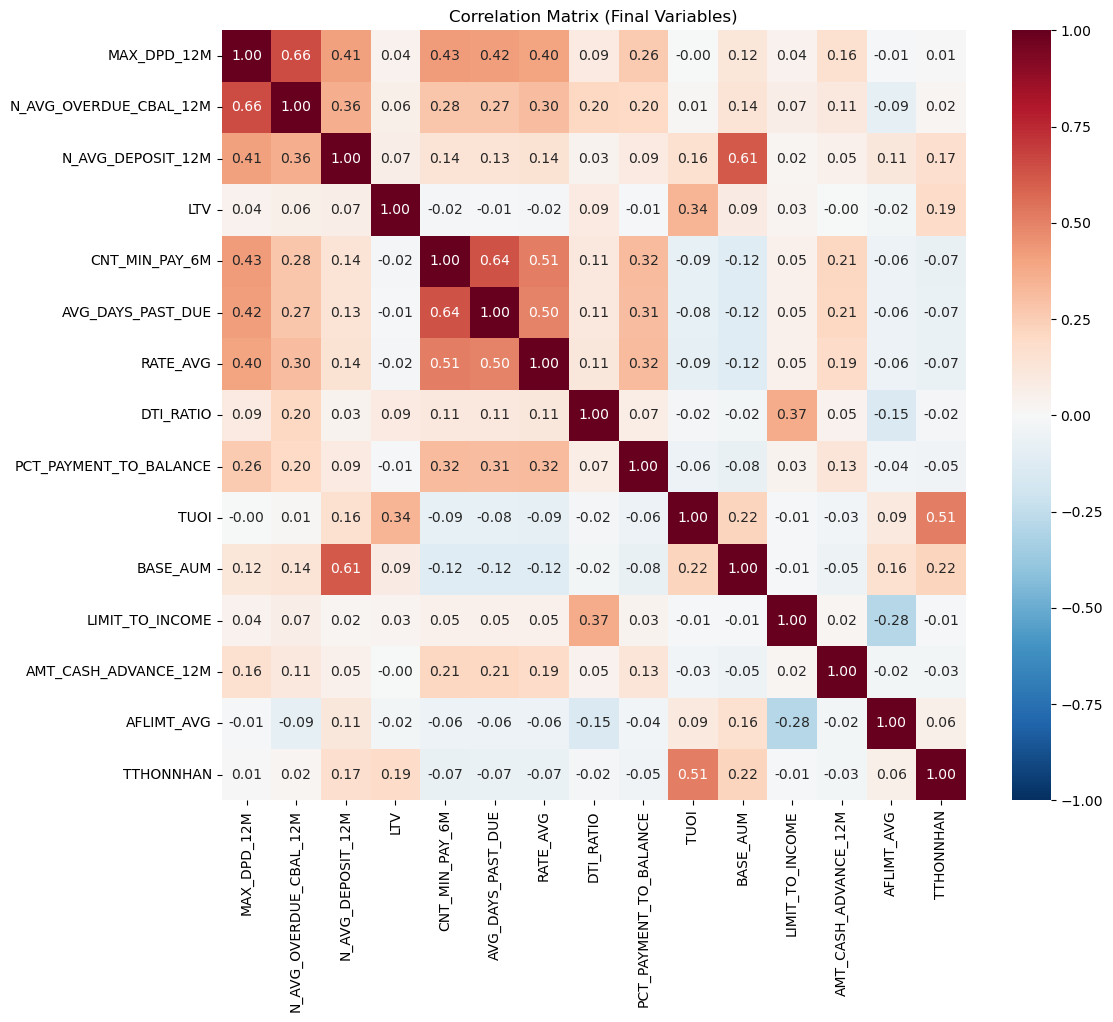

In [10]:
print("\n[BƯỚC 4] Kiểm tra tương quan và loại bỏ biến (Threshold = 0.7)...")

# --- 1. CHUẨN BỊ DANH SÁCH BIẾN ---
# Lấy danh sách các biến còn lại trong dictionary (đã được clean ở bước 3.5)
available_vars = list(binning_results.keys())

# Lấy IV để sắp xếp giảm dần
var_iv_list = []
for v in available_vars:
    iv = binning_results[v].binning_table.iv
    var_iv_list.append((v, iv))

# Sort: IV cao xếp trước
var_iv_list.sort(key=lambda x: x[1], reverse=True)
sorted_features = [x[0] for x in var_iv_list]

# --- 2. TÍNH TOÁN WOE ---
print(f"  -> Đang tính toán WoE cho {len(sorted_features)} biến...")
df_woe = pd.DataFrame()

for feature in sorted_features:
    try:
        optb = binning_results[feature]
        
        # Preprocessing (Quan trọng: phải khớp với lúc train)
        is_categorical = (optb.dtype == "categorical")
        x_raw = train[feature].copy()
        
        if is_categorical:
            x_clean = x_raw.astype(str).replace('nan', 'Missing').fillna("Missing")
        else:
            x_clean = x_raw # Numerical
            
        # Transform sang WoE
        df_woe[feature] = optb.transform(x_clean, metric="woe")
        
    except Exception as e:
        print(f"  -> Lỗi transform biến {feature}: {e}")

# --- 3. TÍNH MA TRẬN TƯƠNG QUAN & LỌC ---
corr_matrix = df_woe.corr(method='pearson')

kept_vars = []
dropped_log = []

print(f"  -> Bắt đầu lọc tương quan...")

for candidate in sorted_features:
    is_kept = True
    reason = "Initial"
    
    # So sánh biến ứng viên với các biến ĐÃ ĐƯỢC GIỮ
    for existing_var in kept_vars:
        # Lấy hệ số tương quan
        r = corr_matrix.loc[candidate, existing_var]
        
        # Nếu tương quan quá cao (>= 0.7)
        if abs(r) >= 0.7:
            is_kept = False
            reason = f"Corr với {existing_var} (r={r:.2f})"
            break # Dừng kiểm tra, loại luôn
            
    if is_kept:
        kept_vars.append(candidate)
    else:
        # Lưu log
        candidate_iv = binning_results[candidate].binning_table.iv
        dropped_log.append({
            "Variable": candidate,
            "IV": candidate_iv,
            "Reason": reason
        })

# ============================================================
# HIỂN THỊ KẾT QUẢ
# ============================================================
print(f"\n=== KẾT QUẢ SAU KHI LỌC ĐA CỘNG TUYẾN ===")
print(f"Tổng biến đầu vào: {len(sorted_features)}")
print(f"Số biến giữ lại:   {len(kept_vars)}")
print(f"Số biến bị loại:   {len(dropped_log)}")

# 1. Danh sách bị loại
if dropped_log:
    print("\n>>> DANH SÁCH BIẾN BỊ LOẠI (CORRELATION > 0.7):")
    df_dropped = pd.DataFrame(dropped_log)
    display(df_dropped.style.format({"IV": "{:.4f}"}))

# 2. Danh sách giữ lại
print("\n>>> DANH SÁCH BIẾN CUỐI CÙNG (FINAL SELECTION):")

# Tạo bảng tổng hợp thông tin cho các biến được giữ
final_summary_data = []
for v in kept_vars:
    optb = binning_results[v]
    
    # Lấy thông tin binning để hiển thị cho đẹp
    bt = optb.binning_table.build()
    bt_clean = bt[bt['Bin'].astype(str) != 'Totals']
    valid_bins = bt_clean[bt_clean['Count'] > 0]
    
    final_summary_data.append({
        "Variable": v,
        "IV": optb.binning_table.iv,
        "Min_Bin_Pct": valid_bins['Count (%)'].min() if not valid_bins.empty else 0,
        "Max_Bin_Pct": valid_bins['Count (%)'].max() if not valid_bins.empty else 0
    })

df_final = pd.DataFrame(final_summary_data)
# Sort lại theo IV giảm dần để dễ nhìn
df_final = df_final.sort_values("IV", ascending=False).reset_index(drop=True)

display(df_final.style.format({
    "IV": "{:.4f}",
    "Min_Bin_Pct": "{:.2%}",
    "Max_Bin_Pct": "{:.2%}"
}))

# 3. Vẽ Heatmap (Chỉ vẽ nếu số lượng biến <= 30 để nhìn cho rõ)
if len(kept_vars) <= 30:
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_woe[kept_vars].corr(), annot=True, fmt=".2f", cmap="RdBu_r", vmin=-1, vmax=1)
    plt.title("Correlation Matrix (Final Variables)")
    plt.show()

In [11]:
def transform_to_woe(df, binning_dict, features):
    df_woe = pd.DataFrame(index=df.index)
    for col in features:
        optb = binning_dict[col]
        x_raw = df[col].astype(str).replace("nan", "Missing").fillna("Missing") \
                if optb.dtype == "categorical" else df[col]

        df_woe[col] = optb.transform(x_raw, metric="woe")
    return df_woe

X_train_woe = transform_to_woe(train, binning_results, kept_vars)
X_oos_woe   = transform_to_woe(oos,   binning_results, kept_vars)
X_oot_woe   = transform_to_woe(oot,   binning_results, kept_vars)

X_train_full_woe = X_train_woe.copy() 

LASSO REGRESSION 

In [12]:
# ============================================================
# CẤU HÌNH TOÀN CỤC (CHỈNH 1 LẦN Ở ĐÂY)
# ============================================================
TARGET_LASSO_VARS = 15      # Số lượng biến giữ lại sau Lasso
BRUTE_FORCE_K_MIN = 8       # Số biến tối thiểu trong mô hình final
BRUTE_FORCE_K_MAX = 15      # Số biến tối đa
N_JOBS            = -1      # Số luồng CPU chạy song song
TARGET_COL        = target_col # Tên biến target (đã define ở đầu notebook)

# ============================================================
# BƯỚC 5: LỌC BIẾN BẰNG LASSO (PHIÊN BẢN SILENT)
# ============================================================
print(f"\n[BƯỚC 5] Chạy Lasso Regression (Giữ lại Top {TARGET_LASSO_VARS} biến)...")

lr_lasso = LogisticRegression(
    penalty='l1',
    C=1.0,
    solver='liblinear',
    random_state=42
)

lr_lasso.fit(X_train_full_woe, y_train_full)

# Lấy độ quan trọng theo trị tuyệt đối hệ số
coefs_abs = np.abs(lr_lasso.coef_[0])
df_imp = pd.DataFrame({
    'Variable': kept_vars,
    'Imp': coefs_abs
}).sort_values('Imp', ascending=False)

final_vars_lasso = df_imp.head(TARGET_LASSO_VARS)['Variable'].tolist()

kept_vars = final_vars_lasso
print(f"  -> {len(kept_vars)} biến sau LASSO: {kept_vars}")
std_devs = X_train_full_woe[kept_vars].std()


[BƯỚC 5] Chạy Lasso Regression (Giữ lại Top 15 biến)...
  -> 15 biến sau LASSO: ['AFLIMT_AVG', 'LTV', 'MAX_DPD_12M', 'DTI_RATIO', 'TUOI', 'LIMIT_TO_INCOME', 'N_AVG_DEPOSIT_12M', 'N_AVG_OVERDUE_CBAL_12M', 'CNT_MIN_PAY_6M', 'AMT_CASH_ADVANCE_12M', 'BASE_AUM', 'AVG_DAYS_PAST_DUE', 'PCT_PAYMENT_TO_BALANCE', 'RATE_AVG', 'TTHONNHAN']


In [13]:
# ============================================================
# BƯỚC 7: BRUTE-FORCE OPTIMIZED
# ============================================================
print(f"\n[BƯỚC 7] Chạy Brute-force ({BRUTE_FORCE_K_MIN}-{BRUTE_FORCE_K_MAX} biến) trên {N_JOBS} luồng CPU...")

# Worker Function
def process_combo(cols_idx, feature_names, X_data, y_data, stds):
    vars_names = feature_names[list(cols_idx)]
    vars_names = [v for v in vars_names if v in X_data.columns]   # thêm
    if len(vars_names) == 0:
        return None
    
    X_sub = X_data[vars_names]

    clf = LogisticRegression(
        penalty='l2',
        C=1e9,
        solver='liblinear',
        random_state=42
    )
    clf.fit(X_sub, y_data)

    coefs = clf.coef_[0]

    # Rule 1: Sign must be negative
    if np.any(coefs >= 0):
        return None

    # Rule 2: Weight constraint
    imp = np.abs(coefs * stds[vars_names].values)
    total = imp.sum()
    if total == 0:
        return None
    w = (imp / total) * 100
    if np.any((w < 3) | (w > 35)):
        return None

    # Rule 3: Gini
    pred = clf.predict_proba(X_sub)[:, 1]
    gini = 2 * roc_auc_score(y_data, pred) - 1
    if gini < 0.45:
        return None

    return (len(vars_names), list(vars_names), coefs, w, gini)

# Main Loop
feature_names_arr = np.array(kept_vars)
combos = []

for k in range(BRUTE_FORCE_K_MIN, BRUTE_FORCE_K_MAX + 1):
    combos.extend(itertools.combinations(range(len(kept_vars)), k))

print(f"  -> Tổng số mô hình cần kiểm tra: {len(combos)}")
print("  -> Đang xử lý (vui lòng chờ)...")

# Chạy song song 
results = Parallel(n_jobs=N_JOBS, verbose=1)(
    delayed(process_combo)(c, feature_names_arr, X_train_full_woe, y_train_full, std_devs)
    for c in combos
)

valid_models = [r for r in results if r is not None]
print(f" -> Số mô hình đạt chuẩn: {len(valid_models)}")


[BƯỚC 7] Chạy Brute-force (8-15 biến) trên -1 luồng CPU...
  -> Tổng số mô hình cần kiểm tra: 16384
  -> Đang xử lý (vui lòng chờ)...


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   12.1s


KeyboardInterrupt: 

In [ ]:
valid_sorted = sorted(
    valid_models,
    key=lambda x: x[4],   # x[4] = gini brute-force
    reverse=True          # lấy giảm dần
)

# Lấy top 100 giữ nguyên y nguyên tuple
valid_top100 = valid_sorted[:100]

In [ ]:
# ============================================================
# BƯỚC 8: LỌC TOP 10 MÔ HÌNH ỔN ĐỊNH NHẤT
# ============================================================

X_train_final = X_train_full_woe
X_oos_final = X_oos_woe
X_oot_final = X_oot_woe

print("\n[BƯỚC 8] Đánh giá toàn bộ model hợp lệ trên Train / OOS / OOT...")

model_records = []

for idx, (num_vars, vars_list, coefs, weights, gini_train_bruteforce) in enumerate(valid_top100):

    # 1. Fit Statsmodels Logit
    X_train_best = sm.add_constant(X_train_final[vars_list])
    model_sm = sm.Logit(y_train_full, X_train_best).fit(disp=0)

    # 2. Predict Train
    pred_train = model_sm.predict(X_train_best)
    g_train = 2 * roc_auc_score(y_train_full, pred_train) - 1

    # 3. Predict OOS
    X_oos_best = sm.add_constant(X_oos_final[vars_list])
    pred_oos = model_sm.predict(X_oos_best)
    g_oos = 2 * roc_auc_score(oos[TARGET_COL], pred_oos) - 1

    # 4. Predict OOT
    X_oot_best = sm.add_constant(X_oot_final[vars_list])
    pred_oot = model_sm.predict(X_oot_best)
    g_oot = 2 * roc_auc_score(oot[TARGET_COL], pred_oot) - 1

    # 5. Stability score (chênh lệch càng nhỏ càng tốt)
    stab_oos = abs(g_train - g_oos)
    stab_oot = abs(g_train - g_oot)
    stab_total = stab_oos + stab_oot    # tổng độ chênh

    # 6. Lưu kết quả
    model_records.append({
        "Vars": vars_list,
        "Num_Vars": num_vars,
        "Gini_Train": g_train,
        "Gini_OOS": g_oos,
        "Gini_OOT": g_oot,
        "Stability": stab_total,
        "Weights": weights,
        "SM_Model": model_sm
    })

# ============================================================
# SẮP XẾP MODEL THEO TIÊU CHÍ:
# 1. Gini OOS giảm dần
# 2. Stability tăng dần (ổn định hơn)
# ============================================================

df_models = pd.DataFrame(model_records)

df_models_sorted = df_models.sort_values(
    by=["Gini_OOS", "Stability"],
    ascending=[False, True]
).reset_index(drop=True)

# Lấy top 10
top10 = df_models_sorted.head(10)

print("\n>>> TOP 10 MODEL TỐT NHẤT (SẮP XẾP THEO GINI OOS & STABILITY)")
display(top10[["Num_Vars", "Vars", "Gini_Train", "Gini_OOS", "Gini_OOT", "Stability"]]
        .style.format({
            "Gini_Train": "{:.2%}",
            "Gini_OOS": "{:.2%}",
            "Gini_OOT": "{:.2%}",
            "Stability": "{:.4f}"
        }))

# ============================================================
# IN RA DANH SÁCH BIẾN CỦA 10 MODEL
# ============================================================

print("\n>>> DANH SÁCH BIẾN CỦA TOP 10 MÔ HÌNH")
for i, row in top10.iterrows():
    print(f"\n--- Model #{i+1} ({row['Num_Vars']} biến) ---")
    print(row["Vars"])


[BƯỚC 8] Đánh giá toàn bộ model hợp lệ trên Train / OOS / OOT...

>>> TOP 10 MODEL TỐT NHẤT (SẮP XẾP THEO GINI OOS & STABILITY)


,Num_Vars,Vars,Gini_Train,Gini_OOS,Gini_OOT,Stability
0,8,"[np.str_('AFLIMT_AVG'), np.str_('LTV'), np.str_('MAX_DPD_12M'), np.str_('TUOI'), np.str_('LIMIT_TO_INCOME'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('CNT_MIN_PAY_6M')]",68.85%,69.15%,68.82%,0.0033
1,10,"[np.str_('AFLIMT_AVG'), np.str_('LTV'), np.str_('DTI_RATIO'), np.str_('TUOI'), np.str_('LIMIT_TO_INCOME'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('CNT_MIN_PAY_6M'), np.str_('AVG_DAYS_PAST_DUE'), np.str_('RATE_AVG')]",62.77%,64.06%,63.02%,0.0155
2,9,"[np.str_('AFLIMT_AVG'), np.str_('LTV'), np.str_('DTI_RATIO'), np.str_('TUOI'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('CNT_MIN_PAY_6M'), np.str_('AVG_DAYS_PAST_DUE'), np.str_('RATE_AVG')]",62.56%,64.04%,62.86%,0.0178
3,10,"[np.str_('AFLIMT_AVG'), np.str_('LTV'), np.str_('DTI_RATIO'), np.str_('TUOI'), np.str_('LIMIT_TO_INCOME'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('CNT_MIN_PAY_6M'), np.str_('PCT_PAYMENT_TO_BALANCE'), np.str_('RATE_AVG')]",62.58%,63.90%,62.70%,0.0143
4,9,"[np.str_('AFLIMT_AVG'), np.str_('LTV'), np.str_('DTI_RATIO'), np.str_('TUOI'), np.str_('LIMIT_TO_INCOME'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('CNT_MIN_PAY_6M'), np.str_('RATE_AVG')]",62.45%,63.90%,62.68%,0.0169
5,9,"[np.str_('AFLIMT_AVG'), np.str_('LTV'), np.str_('DTI_RATIO'), np.str_('TUOI'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('CNT_MIN_PAY_6M'), np.str_('PCT_PAYMENT_TO_BALANCE'), np.str_('RATE_AVG')]",62.38%,63.88%,62.53%,0.0166
6,8,"[np.str_('AFLIMT_AVG'), np.str_('LTV'), np.str_('DTI_RATIO'), np.str_('TUOI'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('CNT_MIN_PAY_6M'), np.str_('RATE_AVG')]",62.24%,63.87%,62.52%,0.0192
7,9,"[np.str_('AFLIMT_AVG'), np.str_('LTV'), np.str_('DTI_RATIO'), np.str_('LIMIT_TO_INCOME'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('CNT_MIN_PAY_6M'), np.str_('AVG_DAYS_PAST_DUE'), np.str_('RATE_AVG')]",62.41%,63.86%,62.72%,0.0174
8,8,"[np.str_('AFLIMT_AVG'), np.str_('LTV'), np.str_('DTI_RATIO'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('CNT_MIN_PAY_6M'), np.str_('AVG_DAYS_PAST_DUE'), np.str_('RATE_AVG')]",62.19%,63.83%,62.56%,0.0200
9,10,"[np.str_('AFLIMT_AVG'), np.str_('LTV'), np.str_('DTI_RATIO'), np.str_('TUOI'), np.str_('LIMIT_TO_INCOME'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('CNT_MIN_PAY_6M'), np.str_('AVG_DAYS_PAST_DUE'), np.str_('PCT_PAYMENT_TO_BALANCE')]",62.67%,63.80%,62.72%,0.0118



>>> DANH SÁCH BIẾN CỦA TOP 10 MÔ HÌNH

--- Model #1 (8 biến) ---
[np.str_('AFLIMT_AVG'), np.str_('LTV'), np.str_('MAX_DPD_12M'), np.str_('TUOI'), np.str_('LIMIT_TO_INCOME'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('CNT_MIN_PAY_6M')]

--- Model #2 (10 biến) ---
[np.str_('AFLIMT_AVG'), np.str_('LTV'), np.str_('DTI_RATIO'), np.str_('TUOI'), np.str_('LIMIT_TO_INCOME'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('CNT_MIN_PAY_6M'), np.str_('AVG_DAYS_PAST_DUE'), np.str_('RATE_AVG')]

--- Model #3 (9 biến) ---
[np.str_('AFLIMT_AVG'), np.str_('LTV'), np.str_('DTI_RATIO'), np.str_('TUOI'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('CNT_MIN_PAY_6M'), np.str_('AVG_DAYS_PAST_DUE'), np.str_('RATE_AVG')]

--- Model #4 (10 biến) ---
[np.str_('AFLIMT_AVG'), np.str_('LTV'), np.str_('DTI_RATIO'), np.str_('TUOI'), np.str_('LIMIT_TO_INCOME'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str

In [ ]:
best = top10.iloc[0]
best_vars = best["Vars"]

# Model RAW đã fit bằng statsmodels → đây là model final
model_sm = best["SM_Model"]

In [ ]:
# ============================================================
# BƯỚC 9 – PLATT SCALING (CALIBRATION MODULE)
# ============================================================

print("\n[BƯỚC 9] Chạy Platt Scaling (calibrate PD)...")

# 1. Lấy logit_raw từ model RAW
logit_train = model_sm.predict(sm.add_constant(X_train_final[best_vars]), linear=True)
logit_oos   = model_sm.predict(sm.add_constant(X_oos_final[best_vars]), linear=True)
logit_oot   = model_sm.predict(sm.add_constant(X_oot_final[best_vars]), linear=True)

# 2. Fit Platt model trên TRAIN
model_platt = LogisticRegression(solver="lbfgs")
model_platt.fit(logit_train.values.reshape(-1, 1), y_train_full)

# 3. Predict PD đã calibrate
pd_train = model_platt.predict_proba(logit_train.values.reshape(-1,1))[:,1]
pd_oos   = model_platt.predict_proba(logit_oos.values.reshape(-1,1))[:,1]
pd_oot   = model_platt.predict_proba(logit_oot.values.reshape(-1,1))[:,1]

print(" -> Hoàn tất Platt Scaling!")


[BƯỚC 9] Chạy Platt Scaling (calibrate PD)...
 -> Hoàn tất Platt Scaling!


In [ ]:
# ============================================================
# BƯỚC CUỐI SEGMENT – EXPORT PD CALIBRATED
# ============================================================

print("\n[EXPORT] Xuất file PD calibrated cho segment...")

segment_name = 'seg1'

# Tạo ROW_ID cho từng dataset
train_exp = train.reset_index(drop=False).rename(columns={"index": "ROW_ID"})
oos_exp   = oos.reset_index(drop=False).rename(columns={"index": "ROW_ID"})
oot_exp   = oot.reset_index(drop=False).rename(columns={"index": "ROW_ID"})

# Tạo dataframe cho từng tập
df_train_exp = pd.DataFrame({
    "ROW_ID": train_exp["ROW_ID"],
    "SEGMENT": segment_name,
    "DATA_TYPE": "TRAIN",
    "y": y_train_full,
    "PD": pd_train
})

df_oos_exp = pd.DataFrame({
    "ROW_ID": oos_exp["ROW_ID"],
    "SEGMENT": segment_name,
    "DATA_TYPE": "OOS",
    "y": oos[TARGET_COL],
    "PD": pd_oos
})

df_oot_exp = pd.DataFrame({
    "ROW_ID": oot_exp["ROW_ID"],
    "SEGMENT": segment_name,
    "DATA_TYPE": "OOT",
    "y": oot[TARGET_COL],
    "PD": pd_oot
})

# GHÉP 3 TẬP LẠI
df_export = pd.concat([df_train_exp, df_oos_exp, df_oot_exp], ignore_index=True)

# Xuất file
output_file = f"{segment_name}_pd_calibrated.parquet"
df_export.to_parquet(output_file, index=False)

print(f"✔ Đã xuất file chuẩn: {output_file}")
print(df_export.head())


[EXPORT] Xuất file PD calibrated cho segment...
✔ Đã xuất file chuẩn: seg1_pd_calibrated.parquet
   ROW_ID SEGMENT DATA_TYPE  y        PD
0       0    seg1     TRAIN  0  0.013076
1       1    seg1     TRAIN  0  0.029996
2       2    seg1     TRAIN  0  0.188587
3       3    seg1     TRAIN  0  0.041129
4       4    seg1     TRAIN  0  0.005291
